<a href="https://colab.research.google.com/github/varun189/-_-CAR-PRICE-PREDICTION-WITH-MACHINE-LEARNING/blob/main/Carpriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OASIS INFOBYTPE TASK NO:3
AIM: CAR PRICE PREDICTION USING MACHINE LEARNING
Problem statement- The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning



**IMPORT LIBRARIES:**
I'll import *datetime* to handle year, *numpy* to work with arrays and *pandas* to read in the dataset files, *matplotlib & seaborn* for plotting and *sklearn* for various machine learning models.

In [1]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

DATA COLLECTION AND PRE PROCCESSING

In [2]:
#LOADING THE data from csv file to pandas dataframe
car_datset = pd.read_csv('/content/car data.csv')

In [3]:
#inspecting the first 5 rows of the dataset
car_datset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
#checking the no of rows and columns
car_datset.shape

(301, 9)

In [6]:
#getting some information about the dataset
car_datset.info


<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1

In [7]:
#checking the number of missing values
car_datset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [17]:
#checking the distribution of the categorical data
print(car_datset.Fuel_Type.value_counts())
print(car_datset.Selling_type.value_counts())
print(car_datset.Transmission.value_counts())

Petrol    239
Diesel     60
2           2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Selling_type, dtype: int64
0    261
1     40
Name: Transmission, dtype: int64


**ENCODING THE CATEGORICAL DATA**

In [25]:
#encoding "Fuel_Type" columns
car_datset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#encoding "Selling_type" columns
car_datset.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

#encoding "Transmission" columns
car_datset.replace({'Transmission':{'Manual':0,'Automatic':1,}},inplace=True)

In [26]:
car_datset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


SPLITTING THE DATA AND TARGET

In [29]:
X = car_datset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_datset['Selling_Price']

In [31]:
print(X)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

In [32]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


SPLITTING THE TRAINING AND TEST DATA

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

MODEL TRAINING

1. LINEAR REGRESSION


In [34]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [36]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

MODEL EVALUTATION


In [37]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [38]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8796483009370215


Visualize the actual prices and Predicted prices

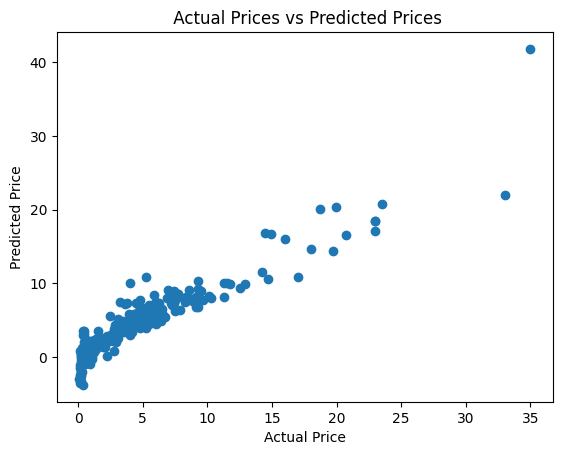

In [39]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [41]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [42]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8365861023210703


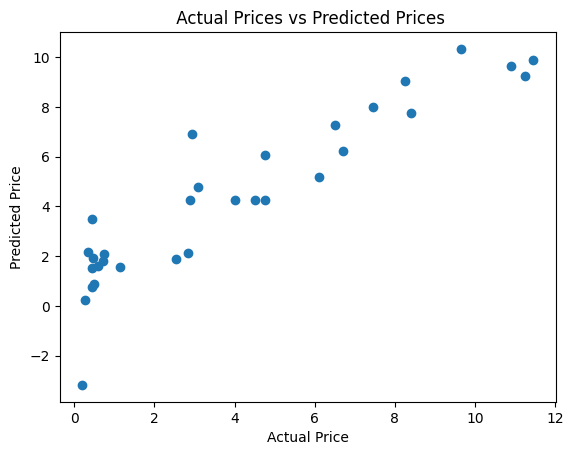

In [43]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

2) LASSO REGRESSION



In [45]:
# loading the linear regression model
lass_reg_model = Lasso()

In [47]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

MODEL EVALUATION

In [50]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [51]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8424480718240743


Visualize the actual prices and Predicted prices

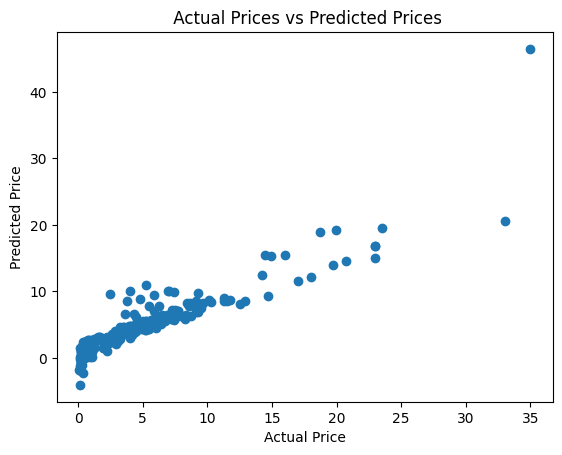

In [52]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [53]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [54]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8709763132343395


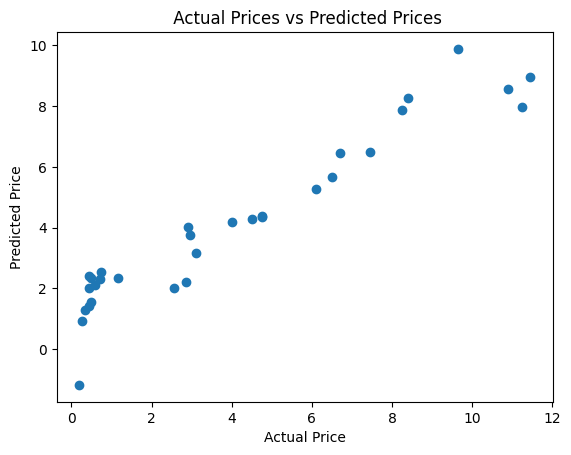

In [55]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()